<h1>Questions to be handed in for project 7:</h1>

<p>To get started, we load the <code>Gadfly</code> backend for <code>Plots</code> so that we can make plots, and the <code>Roots</code> package for its <code>D</code> and <code>fzero</code> functionality:</p>

In [ ]:
using Plots
gadfly()
using Roots			

<h3>Quick background</h3>

<p>Read about this material here: <a href="http://mth229.github.io/first-second-derivatives.html">Exploring first and second derivatives with Julia</a>.</p>

<p>For the impatient, this assignment looks at the relationship between a function, $f(x)$, and its first and second derivatives, $f'(x)$ and $f''(x)$. The basic relationship can be summarized (though the devil is in the details) by:</p>

<p><code>*</code> if the first derivative is <em>positive</em> on $(a,b)$ then the function   is <em>increasing</em> on $(a,b)$.</p>

<p><code>*</code> If the second derivative is <em>positive</em> on $(a,b)$ then the function   is <em>concave up</em> on $(a,b)$.</p>

<p>(The devil here is that the converse statements are not quite always true.)</p>

<p>We can use the <code>D</code> operator from the <code>Roots</code> package to find the first and second derivatives of <code>f</code>. Recall, if <code>f</code> is a function, then <code>D&#40;f&#41;</code> will be a function that computes its <em>first</em> derivative and <code>D&#40;f,2&#41;</code> will be a function that computes its <em>second</em> derivative. If you define this function (ignoring any warnings):</p>

In [ ]:
Base.ctranspose(f::Function) = D(f)

ctranspose (generic function with 53 methods)

<p>then you can use <code>f&#39;</code> instead of <code>D&#40;f&#41;</code> and <code>f&#39;&#39;</code> in place of <code>D&#40;f,2&#41;</code>.</p>

<p>In the notes, the following function is used to plot a function <code>f</code> using two colors depending on whether the second function, <code>g</code> is positive or not.</p>

In [ ]:
function plotif(f, g, a, b)
  plot([f, x -> g(x) > 0.0 ? f(x) : NaN], a, b, linewidth=5)
end

plotif (generic function with 1 method)

plotif (generic function with 1 method)

<p>This allows a graphical exploration of the above facts. For example, using it like this: <code>plotif&#40;f,f&#39;, a, b&#41;</code> will show a different color when $f(x)$ is <em>increasing</em> whereas <code>plotif&#40;f,f,a,b&#41;</code> will show a different color when $f(x)$ is <em>positive</em>.</p>

<hr />

<p>As a reminder</p>

<p><code>*</code> a <em>critical</em> point of $f$ is a value in the domain of $f(x)$ for which the derivative is $0$ or undefined. These are often but <strong>not always</strong> where $f(x)$ has a local maximum or minimum. </p>

<p><code>*</code> An <em>inflection point</em> of $f$ is a value in the domain of $f(x)$ where the concavity of $f$ changes. (These are <em>often</em> but <strong>not always</strong> where $f''(x)=0$.)</p>

<p>We can graphically identify these points or find them numerically by finding zeroes of the appropriate function.  To find zeros we have the function call <code>fzero&#40;f, a&#41;</code> to find a zero iteratively starting at $x=a$ or <code>fzeros&#40;f, &#91;a,b&#93;&#41;</code> to naively search for any zeros in the interval $[a,b]$.  (Recall, <code>fzeros</code> may miss some values, so a graph should always be made to double check)</p>

<p>For example:</p>

In [ ]:
f(x) = 1 + cos(x) + cos(2x)
fzero(f, 1.5)

1.5707963267948966

<p>Or to get all values in an interval:</p>

In [ ]:
zs = fzeros(f, [0, 2pi])

4-element Array{Float64,1}:
 1.5708 
 2.0944 
 4.18879
 4.71239

<p>The answer from <code>fzeros</code> is a vector of values. You can get individual ones different way or work with them all at once. For example, here is the derivative's value at each point:</p>

In [ ]:
map(f', zs)

4-element Array{Float64,1}:
 -1.0     
  0.866025
 -0.866025
  1.0     

<p>In addition, there are two main derivative tests:</p>

<p><code>*</code> The <strong>first derivative test</strong>:  This states that for a differentiable function $f(x)$ with a critical point at $c$ then if $f'(x)$ changes sign from $+$ to $-$ at $c$ then $f(c)$ is a local maximum and if it changes sign from $-$ to $+$ then $f(c)$ is a local minimum.</p>

<p><code>*</code> The <strong>second derivative test</strong>: This states that if $c$ is a critical point of $f(x)$ and $f''(c) > 0$ then $f(c)$ is a local minimum and if $f''(c) < 0$ then $f(c)$ is a local maximum.</p>

<h3>Questions</h3>

<h4>Graphical explorations</h4>

<ul>
<li>The <code>airy</code> function is a <em>built-in</em> function that is important for   some applications. It is likely to be unfamiliar. Make a graph using   <code>plotif</code> to investigate when the <code>airy</code> function is positive on the   interval $(-5,5)$. Your answer should use interval   notation. (Recall, when the second function passed to <code>plotif</code> is   positive, the graph uses a different color, so you need to think   about what function that should be.)</li>
</ul>

<ul>
<li>Make a graph using <code>plotif</code> to investigate when the function $f(x) =   x^x$ is <em>increasing</em> on the interval $(0,2)$. Your answer should use   interval notation. </li>
</ul>

<ul>
<li>Make a graph using <code>plotif</code> to investigate when the function</li>
</ul>


$$
f(x) = \frac{x}{x^2+9}
$$


<p>is <em>concave up</em> on the interval $(-10,10)$. Your answer should use interval notation. </p>

<ul>
<li>Make a graph using <code>plotif</code> to identify any <em>critical points</em> of   $f(x) = x \ln(x)$ on the interval $(0,4)$. Points where the function   changes from increasing to decreasing will be critical points   (though there may be others).</li>
</ul>

<ul>
<li>Make a graph using <code>plotif</code> to identify any <em>inflection points</em> of   $f(x) = \sin(x) - x$ over the interval $(-5,5)$. Points where the   function changes concavity are inflection points (though there may   be others).</li>
</ul>

<ul>
<li>For any polynomial $p(x)$, between any two consecutive zeros there   must be a critical point, perhaps more than one.</li>
</ul>

<p>For $p(x) =x^4 + x^3 - 7x^2 - x + 6$, there are zeros $-3$, $-1$,   $1$ and $2$. Find the critical points using <code>plotif</code>. Which critical   point(s) are between $-1$ and $1$?</p>

<h4>Finding more precise numeric values</h4>

<ul>
<li>Use <code>fzero</code> or <code>fzeros</code> to numerically identify all <em>critical points</em> to the function $f(x) = 2x^3 - 6x^2 - 2x + 4$. (There are no more than $2$.)</li>
</ul>

<ul>
<li>Use <code>fzero</code> of <code>fzeros</code> to numerically identify all <em>inflection points</em> for the   function $f(x) = \ln(x^2 + 2x + 5)$.</li>
</ul>

<ul>
<li>Numerically identify all <em>critical points</em> to the rational function   $f(x)$ defined below. Graphing is useful to identify where the   possible values are.</li>
</ul>


$$
f(x) = \frac{(x-3)\cdot (x-1)\cdot (x+1)\cdot (x+3)}{(x-2)\cdot (x+2)}.
$$


<ul>
<li>Suppose $f'(x) = x^3 - 6x^2 + 11x - 6$. Where is $f(x)$ increasing?   Use interval notation in your answer.</li>
</ul>

<ul>
<li>Suppose $f''(x) = x^2 - 3x + 2$. Where is $f(x)$ concave up? Use   interval notation in your answer.</li>
</ul>

<ul>
<li>For the function $f(x)$ suppose you know $f'(x)=x^3 - 5x^2 + 8x - 4$. Find <em>all</em> the critical points. Use the first derivative test to classify them as local extrema <em>if</em> you can. If you can't say why.</li>
</ul>

<ul>
<li>Suppose $f'(x) = (x^2 - 2) \cdot e^{-x}$. First find the critical points of $f(x)$, then use the second derivative test to classify them.</li>
</ul>

<p>The critical points are:</p>

<p>Classify your critical points using the second derivative test</p>

<ul>
<li>Suppose $f'(x) = x^3 - 7x^2 + 14$. Based on  the plot over the interval   $[-4, 8]$. On what subintervals is $f(x)$ increasing?</li>
</ul>

<p>What did you use to find your last answer?</p>

<p>What are the $x$-coordinates of the relative minima of $f(x)$?</p>

<p>On what subintervals is $f(x)$ concave up?</p>

<p>What did you use to decide?</p>

<p>Find the $x$ coordinates of the inflection points of $f(x)$.</p>

<ul>
<li>Suppose you know the function $f(x)$ has the second derivative given   by the <code>airy</code> function. Use this to answer the following questions   about $f(x)$ over the interval $(-5, 0)$.</li>
</ul>

<p>On what interval(s) is the function $f(x)$ positive?</p>

<p>On what interval(s) is the function $f(x)$ increasing?</p>

<p>On what interval(s) is the function $f(x)$ concave up?</p>

<ul>
<li>A simplified model for the concentration of a certain slow-reacting   medicine in the bloodstream $t$ hours after injection into muscle   tissue is given by</li>
</ul>


$$
f(t) =  3t^2 \cdot e^{-t/5}, \quad t \geq 0.
$$


<p>When will there be maximum concentration?</p>

<p>In the units given, how much is the maximum concentration?</p>

<p>When will the concentration dip below a level of 1.0?</p>

<p>Estimate from a graph when the concentration function changes concavity:</p>

<h3>Concave up has alternate definitions</h3>

<p>The Rogawski book defines $f(x)$ to be concave up for differentiable functions by: </p>

<blockquote>
$f(x)$
<p>is concave up on $(a,b)$ if $f'(x)$ is increasing on $(a,b)$.</p>
</blockquote>

<p>But, not all functions have derivatives. For <em>continuous</em> functions, an alternate definition of concave up on $(a,b)$ is that for any pair of points, $(c,d)$ with $a < c < d < b$ the function value at the average is less than or equal the average of the function values:</p>


$$
f(\frac{c + d}{2}) \leq \frac{f(c) + f(d)}{2}
$$


<ul>
<li>Verify that this holds for the continuous, concave up function $f(x) = e^x$ by picking two values for $c$ and $d$ and checking the inequality. Show your commands.</li>
</ul>

<p>For any function, <a href="https://en.wikipedia.org/wiki/Convex_function">Wikipedia</a> gives a different definition which basically says $f(x)$ is concave up on $(a,b)$ if for <strong>any</strong> pair of points, $c$ and $d$ with $a < c < d < b$ the has the secant line connecting $(c,f(c))$ and $(d,f(d))$ lies <em>above</em> the graph of $f(x)$ over $(c,d)$.</p>

<p>This can be investigated graphically. This function is helpful for making a secant line:</p>

In [ ]:
function secline(f, c, d)
  x0, y0, m = c, f(c), (f(c) - f(d)) / (c - d)
  x -> y0 + m * (x - x0)	# pt-slope form as function
end

secline (generic function with 1 method)

<p>For a function, say, $f(x) = \sin(x)$, it is used as:</p>

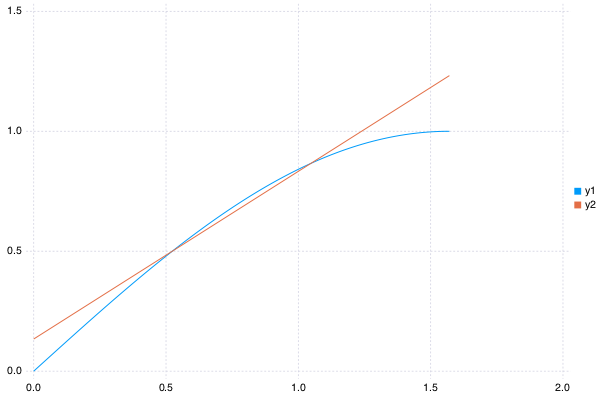

In [ ]:
f(x)=sin(x)
plot([f, secline(f, pi/6, pi/3)], 0, pi/2)

<p>That makes a graph of $\sin(x)$ over $[0, \pi/2]$ and draws the secant line between $[\pi/6, \pi/3]$. This line lies <em>below</em> the graph of $f(x)$, so we can say definitively that $\sin(x)$ is <em>not</em> concave up over $[0, \pi/2]$. (It is concave down.)</p>

<p>For the function $f(x) = x^2 - 2x$, graphically verify $f$ is concave up by  showing for any 3 pairs of points between $(-5,5)$ the secant line is above $f$ over the chosen interval. (You pick the the three pairs of points.) Show your commands.</p>

<ul>
<li>For the function $f(x) = x^3 - 2x$ find a pair of points, $c$ and   $d$, in $(-3,3)$ which illustrate that the function is not concave   up.</li>
</ul>